In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("titanic dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

In [38]:
df.fillna(df.median(numeric_only=True), inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) 

In [39]:
le = LabelEncoder()
categorical_cols = ['Sex', 'Embarked']



In [40]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(df[col])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32
0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32


In [41]:
print("Data Types:\n", df.dtypes)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object


In [42]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
print(X_scaled)

[[-1.72791209  0.87348191  0.75592895 ... -0.4002477  -0.49741333
  -0.47091535]
 [-1.71962474  0.87348191 -1.32287566 ... -0.4002477  -0.51227801
   0.70076689]
 [-1.71133739 -0.31581919  0.75592895 ... -0.4002477  -0.46410047
  -0.47091535]
 ...
 [ 1.71133739  0.87348191  0.75592895 ... -0.4002477  -0.50779638
   0.70076689]
 [ 1.71962474  0.87348191  0.75592895 ... -0.4002477  -0.49345515
   0.70076689]
 [ 1.72791209  0.87348191  0.75592895 ...  0.61989583 -0.23695704
  -1.64259759]]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
dt = DecisionTreeClassifier(random_state=42)

In [47]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [48]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
y_pred = best_dt.predict(X_test) 

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Optimized Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



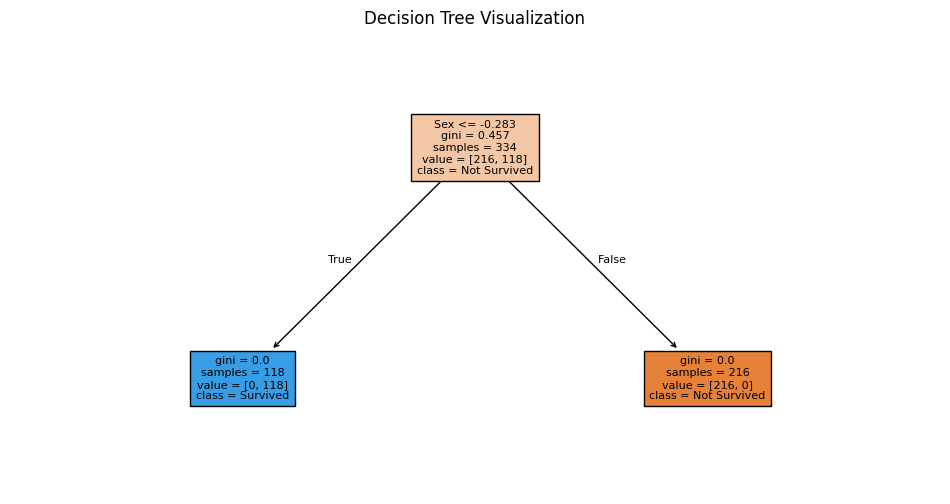

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(best_dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()